## I will use Crsip DM Methodology to solve this data science Problem 

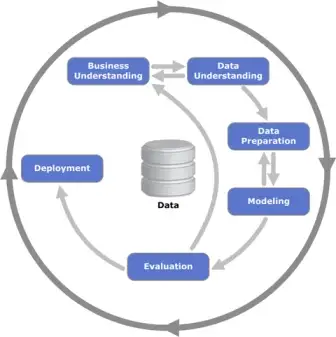
#### These are the major steps involve in crisp dm modelling to solve any data science problem 

#### Business Understanding/Problem Understanding: 
###### " The problem statement was to predict weather the team will win the match or not "

.

#### Data Understanding :

##### column_names and description .

##### total_runs : Total runs scored till that ball
##### wickets : Number of wickets that have fallen
##### target :  The target they are trying to achieve
##### Balls left : How many balls are left in the match
##### won : 1 - if team chasing won, 0 - if they lost. 

##### ''Total_runs , Wickets , Target given , Balls left are features in our data and Won is our Target Variable"

In [53]:
# importing libraries that are necessary for the project .
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
cricket=pd.read_csv(r'cricket_dataset.csv') # Reading dataset

In [3]:
cricket.head(2) # Printing columns in the dataset

,total_runs,wickets,target,balls_left,won
0,0.0,0.0,125,119.0,1
1,0.0,0.0,125,118.0,1


In [33]:
'''
0 are less then 1 but the count of 5880 is better for our model to understand otherwise we have to apply upsampling techniques
to balance classes 
'''
cricket['won'].value_counts()# Checking value count of target variable 


1    9634
0    5880
Name: won, dtype: int64

In [4]:
'''
Describe Function :
We have Sum missing values in the dataset .
Total_Runs function contain skewed data right skewed distribution .
Wicket contain left skewed data .
Target contain normal distribution data 
ball_left is near to normal distribution 

'''
cricket.describe() # Describing function gives us destribution guess about the data variables .

,total_runs,wickets,target,balls_left,won
count,15689.000000,15689.000000,15691.000000,15689.000000,15691.000000
mean,71.395691,2.538530,156.716462,63.766652,0.621184
std,45.430853,2.153691,28.713984,33.006166,0.485108
min,0.000000,0.000000,59.000000,-3.000000,0.000000
25%,34.000000,1.000000,136.000000,36.000000,0.000000
50%,68.000000,2.000000,156.000000,65.000000,1.000000
75%,105.000000,4.000000,180.000000,92.000000,1.000000
max,203.000000,10.000000,238.000000,119.000000,1.000000


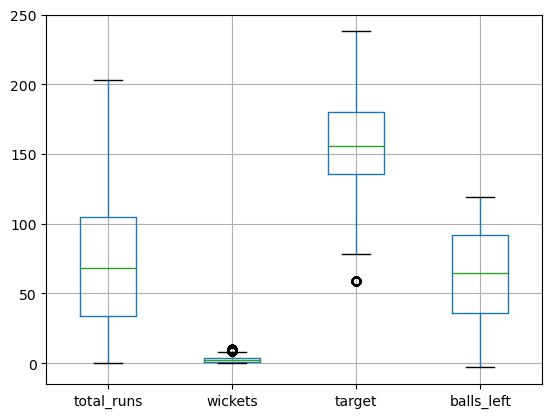

In [5]:
'''
Wicket and target contain outliers but we are not able to remove them they are playing very important role to predict weather a
team will won or not.
'''
boxplot = cricket.boxplot(column=['total_runs','wickets','target','balls_left'])

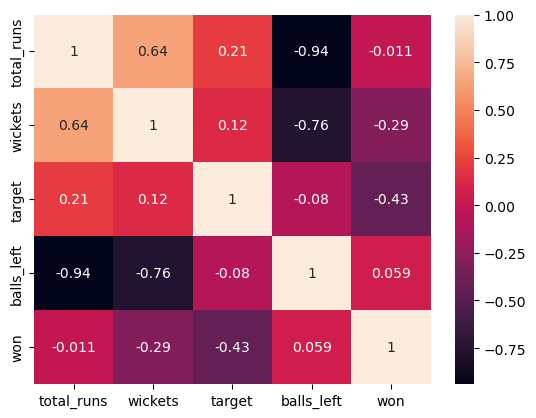

In [6]:
'''
Checking Correlation 
It's good to see that variables are highly correlated with each other becuase its really help algorithm to find the relationship
between the data and gain some insights.
'''
corr_matrix=cricket.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
'''
Now We Will remove duplicates and missing values in the dataset .duplicates confuse model to learn new patterns in the data
and missing values are not accepted by model so for this situation we have to remove them .
'''
cricket.dropna(inplace=True)
cricket.drop_duplicates(inplace=True)


#### Data Preperation :

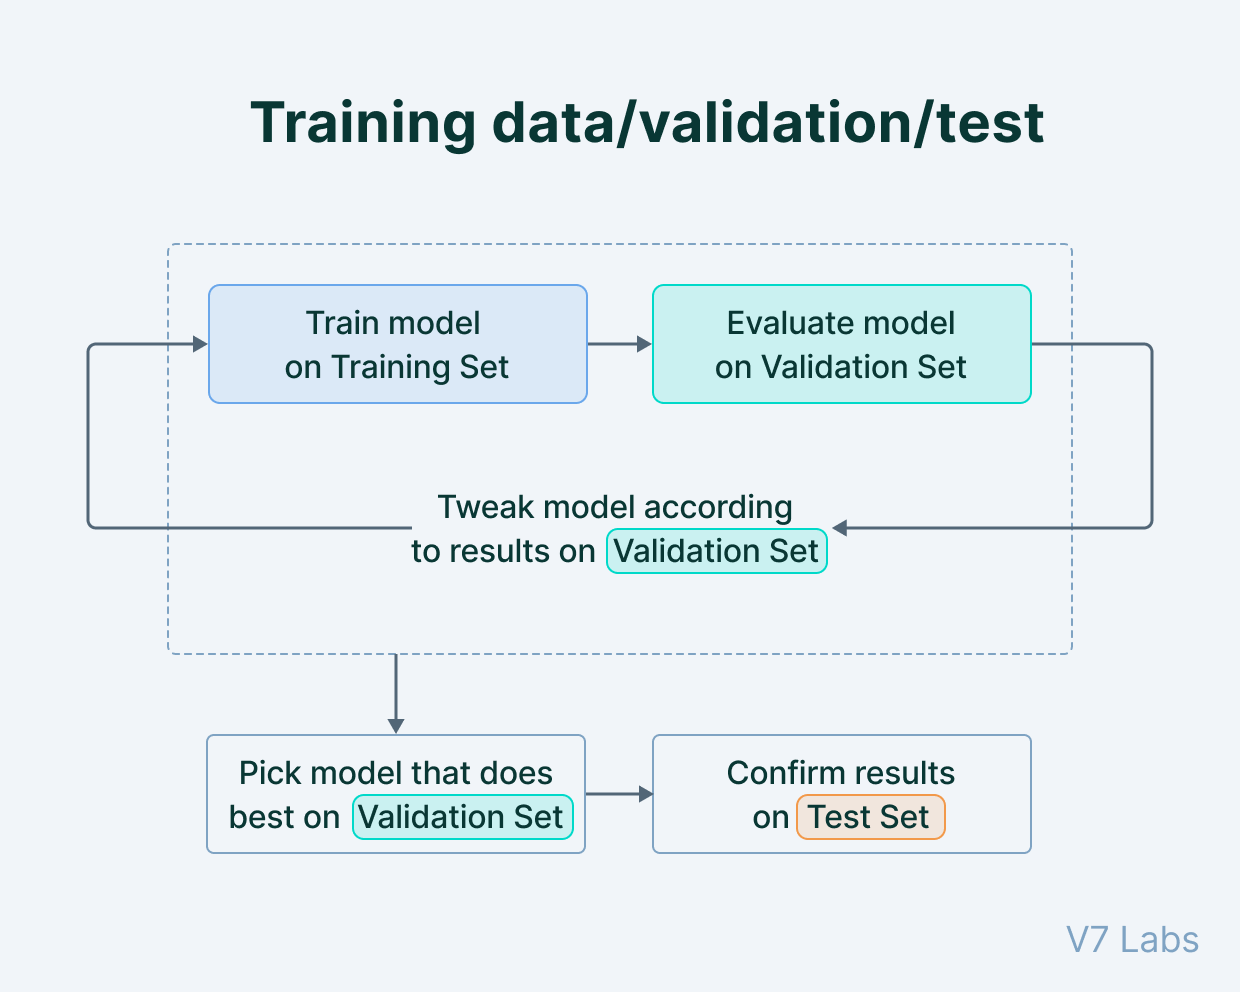

In [22]:
'''
We convert our data into train and test validation for preprocessing
'''
X=cricket[['total_runs', 'wickets', 'target', 'balls_left']]  # Features
y=cricket['won']  # Label

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, stratify=y, test_size=0.2) # 80%

#### Modeling 

In [23]:
clf=RandomForestClassifier(n_estimators=100) ## No of tree we have to apply in parallel

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test) # Predict the class 

##### Model Evaluation 

In [24]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9593941347083468


In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

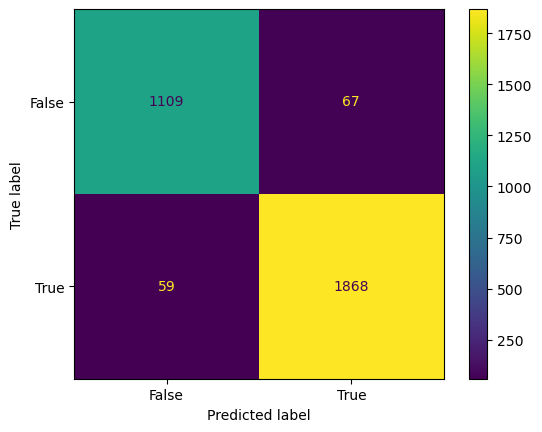

In [36]:

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [35]:
'''
Model is showing good behaviour because no of fp and fn negative are very much less in amount so we can say
that model is showing good pattern here .
'''
print('True Positive(TP)  = ', tp)
print('False Positive(FP) = ', fp)
print('True Negative(TN)  = ', tn)
print('False Negative(FN) = ', fn)

True Positive(TP)  =  1868
False Positive(FP) =  67
True Negative(TN)  =  1109
False Negative(FN) =  59


In [44]:
'''
Precision and Recall Score 
'''
print('Precision Score =',precision_score(y_pred, y_test))
print('Recall Score =',recall_score(y_pred, y_test))

Precision Score = 0.9693824597820446
Recall Score = 0.965374677002584


In [47]:
'''
Now we can find out roc and auc curve to find out how well our model difference between 0 and 1 
'''
pred_prob = clf.predict_proba(X_test)


In [61]:
'''
Find out the threshhold value fpr , tpr
'''
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [58]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])

print('AUC SCORE',auc_score1)

AUC SCORE 0.992225146415598


C:\Users\Admin\AppData\Local\Temp\ipykernel_14000\2428625928.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


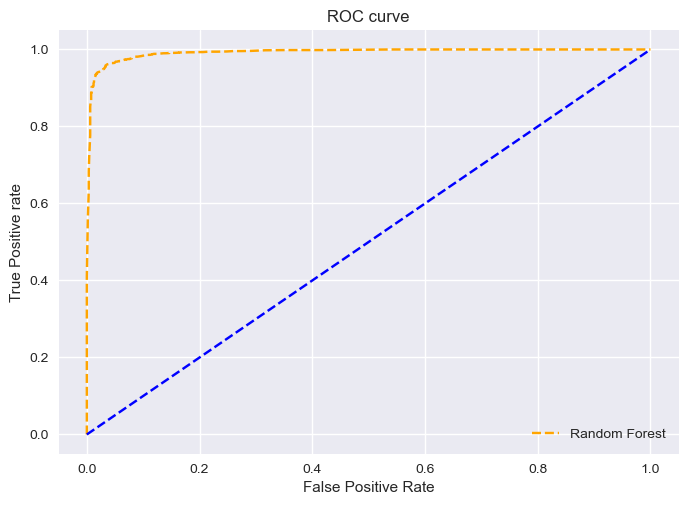

In [59]:

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

#### Storing Model 

In [67]:
# save the model to disk
filename = 'Random_Forest_Model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9593941347083468
